In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import matplotlib
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from keras import optimizers
from matplotlib import pyplot
from keras.layers import Dropout
import tensorflow as tf
# lstm autoencoder recreate sequence
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
from keras.layers import LeakyReLU
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.recurrent import LSTM
from pandas.tseries.offsets import *


In [2]:
jan_to_jun_2009 = pd.read_csv("../input/thesis/jan_to_jun_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2009 = pd.read_csv("../input/thesis/jul_to_dec_2009.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2010 = pd.read_csv("../input/thesis/jan_to_aug_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2010 = pd.read_csv("../input/thesis/sep_to_dec_2010.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2011 = pd.read_csv("../input/thesis/jan_to_jun_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2011 = pd.read_csv("../input/thesis/jul_to_dec_2011.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2012 = pd.read_csv("../input/thesis/jan_to_jun_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close']) 
jul_to_dec_2012 = pd.read_csv("../input/thesis/jul_to_dec_2012.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2013 = pd.read_csv("../input/thesis/jan_to_jun_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2013 = pd.read_csv("../input/thesis/jul_to_dec_2013.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2014 = pd.read_csv("../input/thesis/jan_to_jun_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2014 = pd.read_csv("../input/thesis/jul_to_dec_2014.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2015 = pd.read_csv("../input/thesis/jan_to_jun_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2015 = pd.read_csv("../input/thesis/jul_to_dec_2015.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2016 = pd.read_csv("../input/thesis/jan_to_jun_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2016 = pd.read_csv("../input/thesis/jul_to_dec_2016.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jun_2017 = pd.read_csv("../input/thesis/jan_to_jun_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jul_to_dec_2017 = pd.read_csv("../input/thesis/jul_to_dec_2017.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])
jan_to_jul_2018 = pd.read_csv("../input/thesis/jan_to_jul_2018.csv",index_col=0,usecols=['TR_DATE','VALUE (in Rs)','RFDE_INSTR_TYPE','BSE_Close'])



#ALL Files are concatenated together 

df = pd.concat([jan_to_jun_2009,jul_to_dec_2009,jan_to_jun_2010,jul_to_dec_2010,jan_to_jun_2011,jul_to_dec_2011,jan_to_jun_2012,jul_to_dec_2012,jan_to_jun_2013,jul_to_dec_2013,jan_to_jun_2014,jul_to_dec_2014,jan_to_jun_2015,jul_to_dec_2015,jan_to_jun_2016,jul_to_dec_2016,jan_to_jun_2017,jul_to_dec_2017,jan_to_jul_2018])


#Instrument type Equity is selected.

df = df.loc[df['RFDE_INSTR_TYPE'] == 'REG_DL_INSTR_EQ']

df =df.reset_index()
#Renaming of the column 

df = df.rename(columns={'VALUE (in Rs)': 'Sale'})

#Converting the TR_DATE columns which denotes the transaction date into date time formate. 

df['TR_DATE'] = df['TR_DATE'].astype('datetime64[D]')




In [3]:

def DataFrameCreation(df):
    
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1['Date'] = df['TR_DATE'].values
    df1['Sale'] = df['Sale'].values
    df2['Date'] = df['TR_DATE'].values
    df2['BSE_Close'] = df['BSE_Close'].values
    


#Data is day wise distributed. Thus summing together to get the total sum of Equity instrument sold per day 

    df1 = df1.groupby(['Date']).sum()

    df1 = df1.reset_index(level='Date')

#Getting the exact value of different macro-economic variables per day. 

    df2 = df2.groupby(['Date'], as_index=False).mean()


#Formulating the dataset with columns Date, Sale, and macro-economic variables. 

    df1['BSE_Close'] = df1['Date'].map(df2.set_index('Date')['BSE_Close'])

    test = df1

#For the year 2009 there are 3 dates for which twitter sentiment is missing. They are replaced by the previous values.

    

    TestingFrame = pd.DataFrame(data=test.values,columns=test.columns)
    return TestingFrame



In [4]:
from statsmodels.tsa.stattools import adfuller
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)


In [5]:
TestingFrame = DataFrameCreation(df)
TestingFrame = TestingFrame.dropna()

In [6]:
del TestingFrame['BSE_Close']
TestingFrame = TestingFrame.reset_index()
del TestingFrame['index']
TestingFrame

,Date,Sale
0,2009-01-01,3.34339e+09
1,2009-01-02,1.54256e+10
2,2009-01-05,2.90138e+10
3,2009-01-06,4.10181e+10
4,2009-01-07,5.93318e+10
...,...,...
2368,2018-07-24,9.68496e+10
2369,2018-07-25,8.564e+10
2370,2018-07-26,1.60345e+11
2371,2018-07-27,9.0698e+10


In [7]:
from scipy import stats
import numpy as np

def Outlier(DataFrame):
    SalesArray = DataFrame['Sale'].values
    SalesArray = SalesArray.astype(float)

    Zscores = stats.zscore(SalesArray)
    z = np.abs(Zscores)

    threshold = 3
    Outliers = np.where(z > 3)

    Outliers = list(Outliers[0])
    return Outliers 

Outliers = Outlier(TestingFrame)
TestingFrame.drop(TestingFrame.index[Outliers],inplace=True)
TestingFrame = TestingFrame.reset_index()
del TestingFrame['index']


In [8]:
#SomeValues = ['2009-10-17','2012-01-07','2012-03-03','2012-04-28','2012-09-08','2013-05-11','2013-11-03','2014-03-22','2015-02-28','2016-10-30'] 

#Indexes = []
#Indexes = (TestingFrame.loc[TestingFrame['Date'].isin(SomeValues)].index.values)

#TestingFrame = TestingFrame.drop(Indexes)

#TestingFrame = TestingFrame.reset_index()
#del TestingFrame['index']
#TestingFrame.shape

In [9]:
#figure(figsize=(20,10))
#rolling_mean = TestingFrame.Sale.rolling(window=3).mean()
#rolling_mean2 = TestingFrame.Sale.rolling(window=12).mean()
#plt.plot(TestingFrame.Date, TestingFrame.Sale, label='AMD')
#plt.plot(TestingFrame.Date, rolling_mean, label='AMD 7 Day SMA', color='orange')
#plt.plot(TestingFrame.Date, rolling_mean2, label='AMD 28 Day SMA', color='magenta')
#plt.legend(loc='upper left')
#plt.show()

In [10]:
TestingFrame['Sale'] = TestingFrame['Sale'].astype('float')
TestingFrame.dtypes

Date    datetime64[ns]
Sale           float64
dtype: object

In [ ]:
import statsmodels.api as sm
matplotlib.rcParams['figure.figsize'] = [20.0,5.0]
decomposition = sm.tsa.seasonal_decompose(TestingFrame.Sale.values,freq=20,model='additive')
fig = decomposition.plot()



In [ ]:
Seasonal = pd.DataFrame()
Seasonal['Values'] = decomposition.seasonal
Seasonal['residual'] = decomposition.resid

In [ ]:
#matplotlib.rcParams['figure.figsize'] = [100.0,10.0]
#Seasonal['residual'].plot()

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
N, M = 20, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(Seasonal['Values'], lags=50,ax=ax)
pyplot.show()

In [ ]:
TestingFrame.dtypes

In [11]:
TestingFrame.set_index('Date', inplace=True)
DataForArima = TestingFrame['Sale']

In [ ]:
test_for_stationary(DataForArima) 

In [12]:
DataForArimaDiff = DataForArima.diff(1)
DataForArimaDiff.dropna(inplace=True)

In [ ]:
test_for_stationary(DataForArimaDiff) 

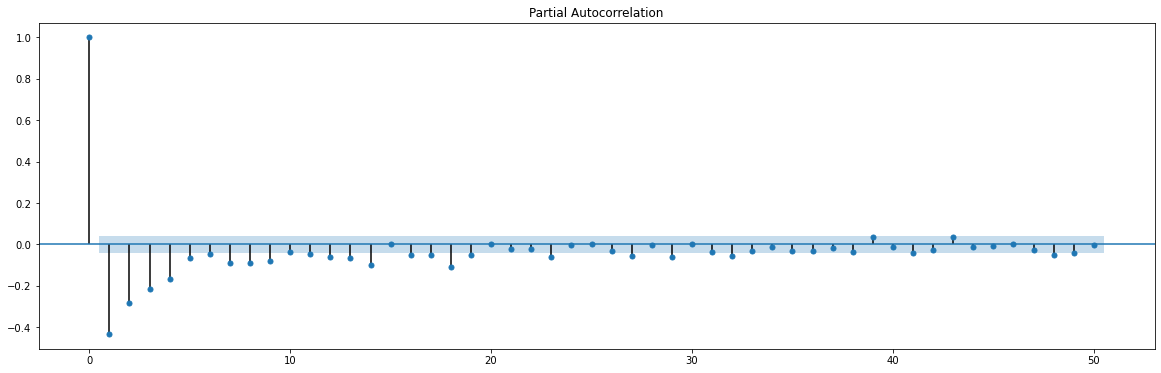

In [50]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
N, M = 20, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(DataForArimaDiff, lags=50,ax=ax)
pyplot.show()

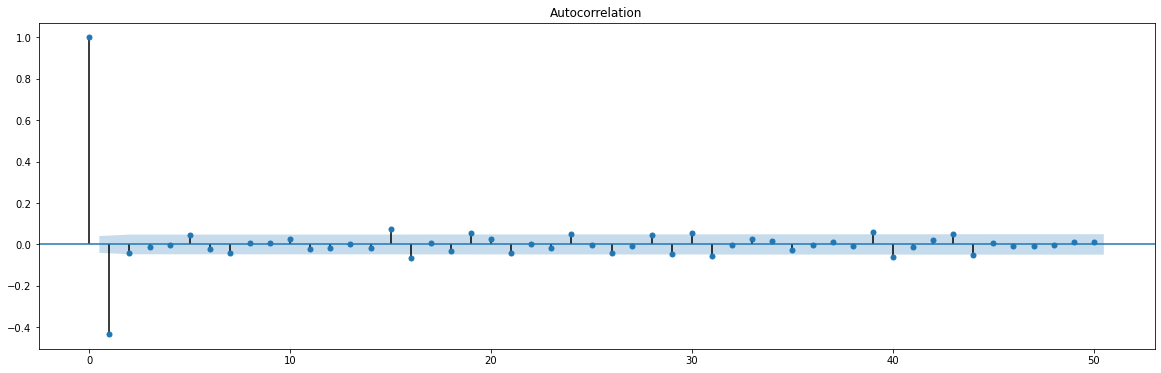

In [49]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
N, M = 20, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_acf(DataForArimaDiff, lags=50,ax=ax)
pyplot.show()

In [37]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(DataForArimaDiff, nlags=50)
lag_pacf = pacf(DataForArimaDiff, nlags=50, method='ols')
#

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


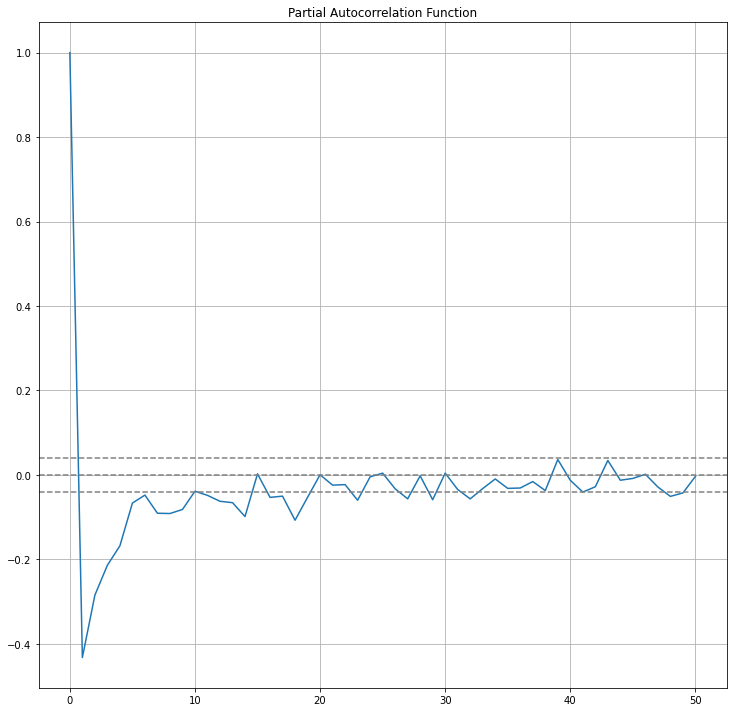

In [43]:
#Plot PACF:
from statsmodels.graphics.tsaplots import plot_pacf
plt.subplot(122)
plt.plot(lag_pacf)
matplotlib.rcParams['figure.figsize'] = [10.0,20.0]
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(DataForArimaDiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(DataForArimaDiff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.grid()
plt.tight_layout()

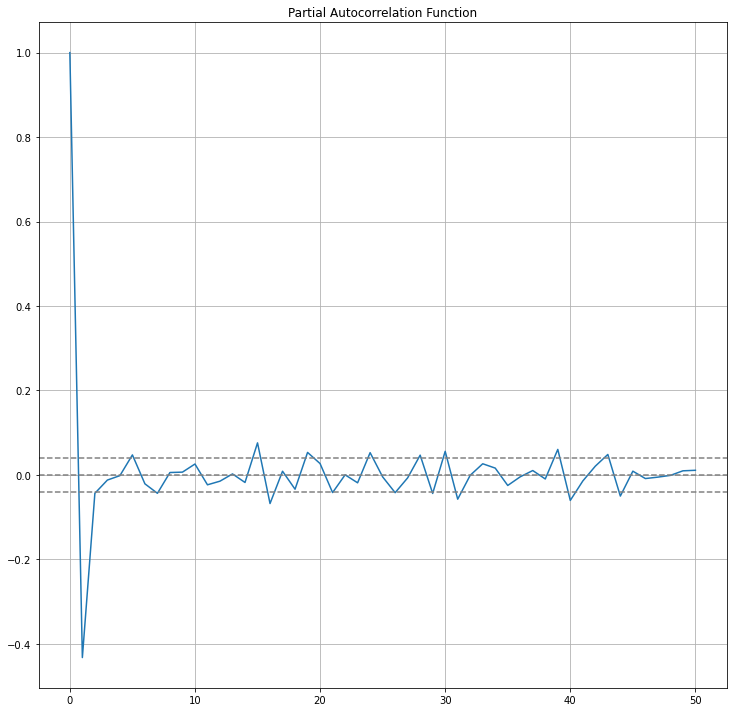

In [45]:
#Plot ACF:
plt.subplot(122)
matplotlib.rcParams['figure.figsize'] = [10.0,10.0]
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(DataForArimaDiff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(DataForArimaDiff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.grid()
plt.tight_layout()

In [ ]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train, test = X[0:2318], X[2318:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0,typ='levels')
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
#p_values = [2,4]
#d_values = [1]
#q_values = [2,5]
#warnings.filterwarnings("ignore")
#evaluate_models(DataForArima.values, p_values,d_values, q_values)

In [16]:
from sklearn.utils.validation import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [18]:
DataForArima.shape

(2339,)

In [19]:
#X = DataForArima.values
#train = X[0:2339]
#history = [x for x in train]
#predictions = list()
#for t in range(22):
#	model = ARIMA(history, order=(2,1,2))
#	model_fit = model.fit(disp=0,typ='levels')
#	output = model_fit.forecast()
#	yhat = output[0]
#	predictions.append(yhat)
#	history.append(yhat)
#	print('predicted=%f' % (yhat))
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
#matplotlib.rcParams['figure.figsize'] = [20.0,5.0]
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

In [ ]:
#mean_absolute_percentage_error(test,predictions)

In [47]:
X = DataForArima.values
train,test = X[0:2318], X[2318:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,5))
    model_fit = model.fit(disp=0,typ='levels',transparams=True,trend='nc')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    #history.append(yhat)
    #print('predicted=%f' % (yhat))


predicted=110800254915.516235, expected=82470155616.480118
predicted=99135837119.117126, expected=67996170031.200142
predicted=95581484356.505890, expected=85388056189.209961
predicted=96289192506.391846, expected=79106898540.979767
predicted=91516028495.051071, expected=91359709290.119904
predicted=87891761166.434052, expected=92885676018.929688
predicted=91690886034.159409, expected=104318444690.520172
predicted=98774499359.170883, expected=88370782803.189880
predicted=98479474200.700775, expected=87786240338.390182
predicted=92633822731.206635, expected=98257930866.869629
predicted=93781227473.884521, expected=80666250177.630203
predicted=90684724672.920258, expected=88063730362.530090
predicted=95137689647.003845, expected=90348605820.559967
predicted=94189658735.422226, expected=69955453651.689972
predicted=86772817775.076859, expected=89136425213.139511
predicted=87227850500.422287, expected=84705152319.809830
predicted=90480203596.434418, expected=96849576490.780243
predicted=94

Test MAPE: 13.579


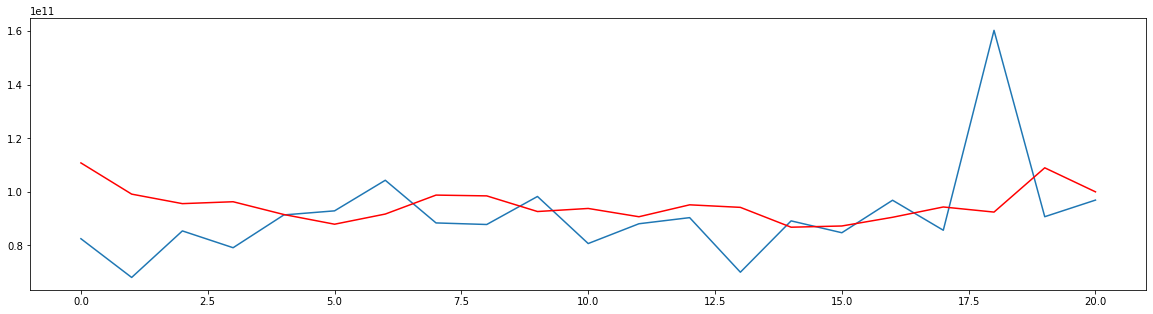

In [48]:
error = mean_absolute_percentage_error(test, predictions)
print('Test MAPE: %.3f' % error)
# plot

matplotlib.rcParams['figure.figsize'] = [20.0,5.0]
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=112663345930.396027, expected=82470155616.480118
predicted=102686172723.939346, expected=67996170031.200142
predicted=94125425987.851318, expected=85388056189.209961
predicted=94227323359.036301, expected=79106898540.979767
predicted=91618163785.714630, expected=91359709290.119904
predicted=93632011109.998901, expected=92885676018.929688
predicted=94679154306.232834, expected=104318444690.520172
predicted=98383062127.812958, expected=88370782803.189880
predicted=95766218948.425781, expected=87786240338.390182
predicted=94730107108.456833, expected=98257930866.869629
predicted=96955296296.485458, expected=80666250177.630203
predicted=92992363206.545441, expected=88063730362.530090
predicted=93372794096.904617, expected=90348605820.559967
predicted=93838362160.396088, expected=69955453651.689972
predicted=88367171046.759140, expected=89136425213.139511
predicted=91177109951.074356, expected=84705152319.809830
predicted=90731644318.092331, expected=96849576490.780243
predicted=9

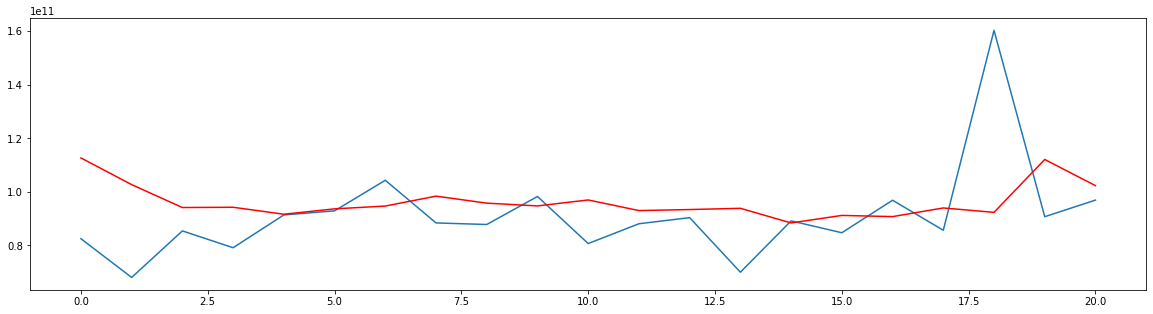

In [30]:
X = DataForArima.values
train,test = X[0:2318], X[2318:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit(disp=0,typ='levels')
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    #history.append(yhat)
    #print('predicted=%f' % (yhat))
error = mean_absolute_percentage_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
matplotlib.rcParams['figure.figsize'] = [20.0,5.0]
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
#X =DataForArima.values
#train, test = X[0:2318], X[2318:len(X)]
#history = [x for x in train]
#predictions = list()
#for t in range(len(test)):
#	model = ARIMA(history, order=(2,1,2))
#	model_fit = model.fit(disp=0,typ='levels')
#	output = model_fit.forecast()
#	yhat = output[0]
#	predictions.append(yhat)
#	obs = test[t]
#	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
#
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

In [ ]:
#mean_absolute_percentage_error(test,predictions)

In [ ]:
#X =DataForArima.values
#train, test = X[0:2318], X[2318:len(X)]
#history = [x for x in train]
#predictions = list()
#for t in range(len(test)):
#	model = ARIMA(history, order=(2,1,3))
#	model_fit = model.fit(disp=0,typ='levels')
#	output = model_fit.forecast()
#	yhat = output[0]
#	predictions.append(yhat)
#	obs = test[t]
#	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

In [ ]:
#mean_absolute_percentage_error(test,predictions)